In [1]:
# Dependencies and Setup
import hvplot.pandas as hvplot
import hvplot
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from scipy import stats
import json
import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Import API key
from alan_api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [2]:
#Read CSV Files
high_df = pd.read_csv('../data/high_inc_data.csv')
low_df = pd.read_csv('../data/low_inc_data.csv')

#Create into data frames
df_high = pd.DataFrame(high_df)
df_low = pd.DataFrame(low_df)


In [3]:
df_high.head()

,NAME,High_med_inc,state,place,City_x,State,City_y,Latitude,Longitude,Store Count,Store Coordinates,Closest Store Distance,Furthest Store Distance,Closest Store Coordinates,Furthest Store Coordinates
0,"Hoover city, Alabama",103194,1,35896,Hoover city,Alabama,"Hoover city, Alabama",33.387197,-86.805680,1.0,"[[-86.80535900676557, 33.404339373956915]]",1.906345,1.906345,"[-86.80535900676557, 33.404339373956915]","[-86.80535900676557, 33.404339373956915]"
1,"Anchorage municipality, Alaska",100751,2,3000,Anchorage municipality,Alaska,"Anchorage municipality, Alaska",61.216313,-149.894852,1.0,"[[-149.90488980910047, 61.19327695751528]]",2.617293,2.617293,"[-149.90488980910047, 61.19327695751528]","[-149.90488980910047, 61.19327695751528]"
2,"Buckeye city, Arizona",95235,4,7940,Buckeye city,Arizona,"Buckeye city, Arizona",33.370320,-112.583776,0.0,[],inf,0.000000,NaN,NaN
3,"Casas Adobes CDP, Arizona",75650,4,10670,Casas Adobes CDP,Arizona,"Casas Adobes CDP, Arizona",32.340932,-111.010201,0.0,[],inf,0.000000,NaN,NaN
4,"Chandler city, Arizona",98664,4,12000,Chandler city,Arizona,"Chandler city, Arizona",33.306203,-111.841185,12.0,"[[-111.8002181, 33.28209729958798], [-111.8326...",4.656479,9.514170,"[-111.8002181, 33.28209729958798]","[-111.74001920444977, 33.31937658388268]"


In [4]:
df_low.head()

,Unnamed: 0,NAME,Low_med_inc,state,place,City_x,State,City_y,Latitude,Longitude,Store Count,Store Coordinates,Closest Store Distance,Furthest Store Distance,Closest Store Coordinates,Furthest Store Coordinates
0,0,"Auburn city, Alabama",54839,1,3076,Auburn city,Alabama,"Auburn city, Alabama",32.601014,-85.516657,0.0,[],inf,0.00000,NaN,NaN
1,1,"Birmingham city, Alabama",39326,1,7000,Birmingham city,Alabama,"Birmingham city, Alabama",33.599853,-86.632216,1.0,"[[-86.58685474667458, 33.67531011917721]]",9.38268,9.38268,"[-86.58685474667458, 33.67531011917721]","[-86.58685474667458, 33.67531011917721]"
2,2,"Dothan city, Alabama",53929,1,21184,Dothan city,Alabama,"Dothan city, Alabama",31.221808,-85.378001,0.0,[],inf,0.00000,NaN,NaN
3,3,"Huntsville city, Alabama",68930,1,37000,Huntsville city,Alabama,"Huntsville city, Alabama",34.729847,-86.585901,0.0,[],inf,0.00000,NaN,NaN
4,4,"Mobile city, Alabama",50051,1,50000,Mobile city,Alabama,"Mobile city, Alabama",30.689362,-88.051896,0.0,[],inf,0.00000,NaN,NaN


In [5]:
#Clean DataFrames

#pulling cols into var
high_col_to_pull = ['City_x', 'State', 'Latitude', 'Longitude', 'High_med_inc']
low_col_to_pull = ['City_x', 'State', 'Latitude', 'Longitude', 'Low_med_inc']

#Selected df
high_sel_df = df_high[high_col_to_pull]
low_sel_df = df_low[low_col_to_pull]

high_sel_df.columns = ['Cities', 'States', 'Lat', 'Lon', 'High Income']
low_sel_df.columns = ['Cities', 'States', 'Lat', 'Lon', 'Low Income']

#removed the word'city' from the City/Town Column
high_sel_df.loc[:, 'Cities'] = high_sel_df['Cities'].str.replace(' city', '', case=False)
low_sel_df.loc[:, 'Cities'] = low_sel_df['Cities'].str.replace(' city', '', case=False)


#removed the word'town' from the City/Town Column
high_sel_df.loc[:, 'Cities'] = high_sel_df['Cities'].str.replace(' town', '', case=False)
low_sel_df.loc[:, 'Cities'] = low_sel_df['Cities'].str.replace(' town', '', case=False)

#removed the word'town' from the City/Town Column
high_sel_df.loc[:, 'Cities'] = high_sel_df['Cities'].str.replace(' CDP', '', case=False)
low_sel_df.loc[:, 'Cities'] = low_sel_df['Cities'].str.replace(' CDP', '', case=False)

#Cleaned DataFrames
high_city_df = high_sel_df
low_city_df = low_sel_df

#clean columns
high_city_df['Cities'].drop_duplicates
low_city_df['Cities'].drop_duplicates

<bound method Series.drop_duplicates of 0                    Auburn
1                Birmingham
2                    Dothan
3                Huntsville
4                    Mobile
               ...         
315      Caguas zona urbana
316    Carolina zona urbana
317    Guaynabo zona urbana
318       Ponce zona urbana
319    San Juan zona urbana
Name: Cities, Length: 320, dtype: object>

In [6]:
high_city_df.head()

,Cities,States,Lat,Lon,High Income
0,Hoover,Alabama,33.387197,-86.805680,103194
1,Anchorage municipality,Alaska,61.216313,-149.894852,100751
2,Buckeye,Arizona,33.370320,-112.583776,95235
3,Casas Adobes,Arizona,32.340932,-111.010201,75650
4,Chandler,Arizona,33.306203,-111.841185,98664


In [7]:
low_city_df.head()

,Cities,States,Lat,Lon,Low Income
0,Auburn,Alabama,32.601014,-85.516657,54839
1,Birmingham,Alabama,33.599853,-86.632216,39326
2,Dothan,Alabama,31.221808,-85.378001,53929
3,Huntsville,Alabama,34.729847,-86.585901,68930
4,Mobile,Alabama,30.689362,-88.051896,50051


In [8]:
low_city_df.groupby('States')['Cities'].count()

States
Alabama            7
Arizona            5
Arkansas           6
California        28
Colorado           3
Connecticut        5
Delaware           1
Florida           37
Georgia            7
Idaho              3
Illinois           9
Indiana            9
Iowa               7
Kansas             4
Kentucky           3
Louisiana          7
Maine              1
Maryland           2
Massachusetts      7
Michigan          10
Minnesota          4
Mississippi        2
Missouri           6
Montana            1
Nebraska           2
Nevada             5
New Jersey         9
New Mexico         3
New York           8
North Carolina    10
North Dakota       2
Ohio               9
Oklahoma           4
Oregon             4
Pennsylvania       7
Puerto Rico        6
Rhode Island       2
South Carolina     4
South Dakota       2
Tennessee          8
Texas             37
Utah               3
Virginia           7
Washington         5
Wisconsin          8
Wyoming            1
Name: Cities, dtype: int64

In [9]:
high_city_df.groupby('States')['Cities'].count()

States
Alabama                   1
Alaska                    1
Arizona                  14
Arkansas                  1
California              114
Colorado                 16
Connecticut               3
District of Columbia      1
Florida                  20
Georgia                   6
Hawaii                    1
Idaho                     2
Illinois                 10
Indiana                   3
Iowa                      2
Kansas                    3
Maryland                 10
Massachusetts            10
Michigan                  7
Minnesota                 9
Missouri                  3
Montana                   1
Nevada                    4
New Hampshire             2
New Jersey                4
New Mexico                1
New York                  2
North Carolina            5
Oklahoma                  2
Oregon                    4
Rhode Island              2
South Carolina            2
Tennessee                 1
Texas                    27
Utah                      8
Virginia     

In [10]:
combined_clean_df = pd.merge(high_city_df, low_city_df, how='inner', on=['Cities'])
# combined_clean_df = combined_clean_df.sort_values(by='Cities', ascending=True)
combined_clean_df

,Cities,States_x,Lat_x,Lon_x,High Income,States_y,Lat_y,Lon_y,Low Income
0,Peoria,Arizona,33.580612,-112.237294,86948,Illinois,40.692568,-89.593010,55955
1,Glendale,California,34.153801,-118.255039,77483,Arizona,33.538686,-112.185994,72411
2,Lakewood,California,33.846539,-118.112278,109309,New Jersey,40.093316,-74.211049,59460
3,Lakewood,Colorado,39.708857,-105.083046,85988,New Jersey,40.093316,-74.211049,59460
4,Pasadena,California,34.163831,-118.156746,95134,Texas,29.691673,-95.196198,57078
5,Richmond,California,6.056255,80.221460,88594,Virginia,37.542341,-77.439876,58988
6,San Marcos,California,34.825117,-114.598742,103595,Texas,35.469264,-97.515679,52040
7,Union,California,34.529078,-117.298461,148460,New Jersey,40.777646,-74.023058,58020
8,Columbia,Maryland,39.199038,-76.841517,120675,Missouri,41.156928,-85.488462,58067
9,Columbia,Maryland,39.199038,-76.841517,120675,South Carolina,41.156928,-85.488462,56175


In [11]:
high_city_df.head(1)
#Test

,Cities,States,Lat,Lon,High Income
0,Hoover,Alabama,33.387197,-86.80568,103194


In [12]:
#Sample view of api 

radius = 10000 
categories = "commercial.food_and_drink"
lat= 34.2228071
lon = -119.0516609

params = {"apiKey": geoapify_key,
            "categories": categories,
            "limit": 20,
            "filter": f"circle:{lon},{lat},{radius}",
            "bias": f"proximity:{lon},{lat}"}

url = "https://api.geoapify.com/v2/places"
data = requests.get(url, params=params).json()
print(json.dumps(data, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    -119.04075021748328,
                    34.22312457149496
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Best Buy Market Wine & Lotto",
                "address_line2": "Pickwick Drive, Camarillo, CA 93010, United States of America",
                "categories": [
                    "building",
                    "building.commercial",
                    "commercial",
                    "commercial.food_and_drink",
                    "commercial.food_and_drink.drinks"
                ],
                "city": "Camarillo",
                "country": "United States",
                "country_code": "us",
                "county": "Ventura County",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Databas

In [13]:
radius = 10000
categories = "commercial.food_and_drink.health_food"

# Initialize an empty list to store the dictionaries
result_data = []

print("Starting commercial.food_and_drink.health_food search...")

# Iterate through both high_city_df and low_city_df
for df,income_column, category_label in [
    
    (high_city_df, 'High Income', 'High'),
    (low_city_df, 'Low Income', 'Low')
]:
    for index, row in df.iterrows():
        lat, lon = row['Lat'], row['Lon']

        params = {
            "apiKey": geoapify_key,
            "categories": categories,
            "filter": f"circle:{lon},{lat},{radius}",
            "bias": f"proximity:{lon},{lat}"
        }

        url = "https://api.geoapify.com/v2/places"

        try:
            # Make the API request
            response = requests.get(url, params=params)
            response.raise_for_status()  # Raise an HTTPError for bad responses

            # Process the response data
            data = response.json()

            # Check if 'features' key is present and count the number of features
            if 'features' in data:
                count = len(data['features'])
                if count > 0:
                    # Iterate through the features and add relevant information to the result_data list
                    for feature in data['features']:
                        result_data.append({
                            'City': row['Cities'],
                            'State': row['States'],
                            'Lat': lat,
                            'Lon': lon,
                            'Location_Name' : feature['properties']['address_line1'],
                            'Category_Label': category_label,
                            'Income': row[income_column]
                        })

        except requests.exceptions.RequestException as e:
            # Handle exceptions here, e.g., print an error message
            print(f"Error during API request for {row['Cities']}: {e}")

# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(result_data)

# Print the resulting DataFrame
# print(result_df)


Starting commercial.food_and_drink.health_food search...


In [14]:
response = requests.get(url, params=params)
response

<Response [200]>

In [15]:
commerical_health_food_df = result_df
commerical_health_food_df

,City,State,Lat,Lon,Location_Name,Category_Label,Income
0,Phoenix,Arizona,33.448437,-112.074141,Healthy Habit,High,75969
1,Scottsdale,Arizona,33.494219,-111.926018,Lady+Wolf Market,High,100636
2,Scottsdale,Arizona,33.494219,-111.926018,nohoshot,High,100636
3,Tempe,Arizona,33.425512,-111.940016,Lady+Wolf Market,High,76007
4,Alameda,California,37.766461,-122.243496,Family First,High,131116
...,...,...,...,...,...,...,...
395,Caguas zona urbana,Puerto Rico,18.338810,-67.251630,Edward's Go Natural,Low,22060
396,Carolina zona urbana,Puerto Rico,18.407670,-65.981020,Il Nuovo Mercato,Low,36646
397,Guaynabo zona urbana,Puerto Rico,18.380340,-67.188390,Edward's Go Natural,Low,48081
398,Ponce zona urbana,Puerto Rico,18.338810,-67.251630,Edward's Go Natural,Low,16795


In [16]:
selected_columns = ['City', 'State', 'Lat', 'Lon', 'Category_Label', 'Location_Name', 'Income']

# Select the desired columns and drop duplicates
no_dups_health_food_df = commerical_health_food_df[selected_columns].drop_duplicates()

In [17]:
#Healthy food places within the radius of high and low cities. This will be used to plot the data updated
no_dups_health_food_df

,City,State,Lat,Lon,Category_Label,Location_Name,Income
0,Phoenix,Arizona,33.448437,-112.074141,High,Healthy Habit,75969
1,Scottsdale,Arizona,33.494219,-111.926018,High,Lady+Wolf Market,100636
2,Scottsdale,Arizona,33.494219,-111.926018,High,nohoshot,100636
3,Tempe,Arizona,33.425512,-111.940016,High,Lady+Wolf Market,76007
4,Alameda,California,37.766461,-122.243496,High,Family First,131116
...,...,...,...,...,...,...,...
395,Caguas zona urbana,Puerto Rico,18.338810,-67.251630,Low,Edward's Go Natural,22060
396,Carolina zona urbana,Puerto Rico,18.407670,-65.981020,Low,Il Nuovo Mercato,36646
397,Guaynabo zona urbana,Puerto Rico,18.380340,-67.188390,Low,Edward's Go Natural,48081
398,Ponce zona urbana,Puerto Rico,18.338810,-67.251630,Low,Edward's Go Natural,16795


In [18]:
high_mean = no_dups_health_food_df.loc[no_dups_health_food_df['Category_Label'] == 'High', 'Income'].mean().__round__(2)
low_mean = no_dups_health_food_df.loc[no_dups_health_food_df['Category_Label'] == 'Low', 'Income'].mean().__round__(2)
high_max_income = no_dups_health_food_df.loc[no_dups_health_food_df['Category_Label'] == 'High', ['State', 'City', 'Income', 'Location_Name']].max()
low_max_income = no_dups_health_food_df.loc[no_dups_health_food_df['Category_Label'] == 'Low', ['State', 'City', 'Income', 'Location_Name']].min()


print(f'High Income Average: {high_mean}')
print(f'Low Income Average: {low_mean}')
print(f'Income High: {high_max_income}')
print(f'Income Low: {low_max_income}')

High Income Average: 103228.58
Low Income Average: 57435.15
Income High: State                   Wisconsin
City                  Westminster
Income                     186892
Location_Name    néktər Juice Bar
dtype: object
Income Low: State                     Alabama
City                        Akron
Income                      16795
Location_Name    2B Fit Nutrition
dtype: object


In [19]:
map_plot_all = no_dups_health_food_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 600,
    color = "City",
    hover = True,
    dynamic =True,
    hover_cols="all"
)
#Save hvPlot in html to open in local browser
# hvplot.save(map_plot_all, '../export_maps/hvmap_all.png')
map_plot_all

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,index,State,Category_Label,Location_Name,Income)

In [20]:
map_plot_high = no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High'].hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 600,
    color = "City",
    hover = True,
    dynamic =True,
    hover_cols="all"
)

map_plot_high

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,index,State,Category_Label,Location_Name,Income)

In [21]:
map_plot_low = no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'Low'].hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 600,
    color = "City",
    hover = True,
    dynamic =True,
    hover_cols="all"
)

map_plot_low

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,index,State,Category_Label,Location_Name,Income)

In [22]:
map_plot_nj = no_dups_health_food_df[no_dups_health_food_df['State'] == 'New Jersey'].hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 600,
    color = "City",
    hover = True,
    dynamic =True,
    hover_cols="all"
)

map_plot_nj

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,index,State,Category_Label,Location_Name,Income)

In [23]:
#Function to create Linear Plots
# Create Plot
def liner_regression_plts(x_values, y_values, y_label, annotation_coords=(10, -30),title=""):
    # Calculate linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
        
    # Create scatter plot
    plt.scatter(x_values, y_values, label='Data points')

    #Line Equasion
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)  
        
    # Create regression line plot
    plt.plot(x_values, regress_values, color='red', label='Linear Regression')
    plt.title(title)    
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.grid(True)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show the plot
    plt.show()

y = -21.21x +104042.94
The r-value is: 1.293952313506774e-05


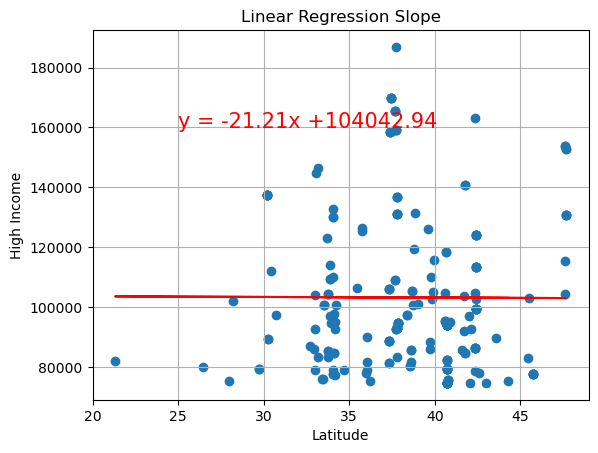

In [24]:
liner_regression_plts(no_dups_health_food_df["Lat"][no_dups_health_food_df['Category_Label'] == 'High'], no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High']['Income'], "High Income", (25, 160000),"Linear Regression Slope")

y = 661.11x +32695.49
The r-value is: 0.15163254039321966


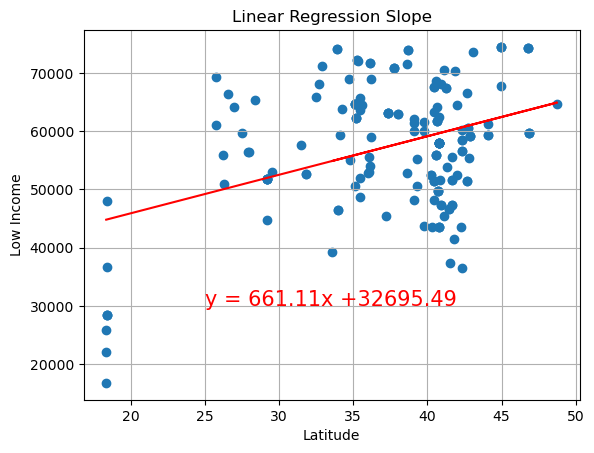

In [25]:
liner_regression_plts(no_dups_health_food_df["Lat"][no_dups_health_food_df['Category_Label'] == 'Low'], no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'Low']['Income'], "Low Income", (25, 30000),"Linear Regression Slope")

In [26]:
no_dups_health_food_df.head(1)

,City,State,Lat,Lon,Category_Label,Location_Name,Income
0,Phoenix,Arizona,33.448437,-112.074141,High,Healthy Habit,75969


In [27]:
radius = 10000
categories = "commercial.food_and_drink.health_food"

# Create a new column to store the Health Store Count for each city
high_city_df['Health Store Count'] = 0

for index, row in high_city_df.iterrows():
    lat, lon = row['Lat'], row['Lon']  

    params = {"apiKey": geoapify_key,
              "categories": categories,
              "filter": f"circle:{lon},{lat},{radius}",
              "bias": f"proximity:{lon},{lat}"}

    url = "https://api.geoapify.com/v2/places"
    data = requests.get(url, params=params).json()

    # Count the number of health food places
    try:
        health_store_count = len(data["features"])
    except (KeyError, IndexError):
        health_store_count = 0

    # Update the Health Store Count for the respective city only if it's greater than 0
    if health_store_count > 0:
        high_city_df.loc[index, 'Health Store Count'] = health_store_count

    print(f"{row['Cities']} - # Health Food Places Found: {health_store_count}")
  

Hoover - # Health Food Places Found: 0
Anchorage municipality - # Health Food Places Found: 0
Buckeye - # Health Food Places Found: 0
Casas Adobes - # Health Food Places Found: 0
Chandler - # Health Food Places Found: 0
Gilbert - # Health Food Places Found: 0
Goodyear - # Health Food Places Found: 0
Maricopa - # Health Food Places Found: 0
Mesa - # Health Food Places Found: 0
Peoria - # Health Food Places Found: 0
Phoenix - # Health Food Places Found: 1
Queen Creek - # Health Food Places Found: 0
San Tan Valley - # Health Food Places Found: 0
Scottsdale - # Health Food Places Found: 2
Surprise - # Health Food Places Found: 0
Tempe - # Health Food Places Found: 1
Rogers - # Health Food Places Found: 0
Alameda - # Health Food Places Found: 4
Anaheim - # Health Food Places Found: 1
Antioch - # Health Food Places Found: 0
Berkeley - # Health Food Places Found: 5
Brentwood - # Health Food Places Found: 1
Buena Park - # Health Food Places Found: 0
Burbank - # Health Food Places Found: 1
Cama

In [28]:
no_dups_health_food_df.head()

,City,State,Lat,Lon,Category_Label,Location_Name,Income
0,Phoenix,Arizona,33.448437,-112.074141,High,Healthy Habit,75969
1,Scottsdale,Arizona,33.494219,-111.926018,High,Lady+Wolf Market,100636
2,Scottsdale,Arizona,33.494219,-111.926018,High,nohoshot,100636
3,Tempe,Arizona,33.425512,-111.940016,High,Lady+Wolf Market,76007
4,Alameda,California,37.766461,-122.243496,High,Family First,131116


In [55]:
no_dups_health_food_df[['Location_Name', 'Category_Label']].value_counts().sort_values(ascending=False)

Location_Name          Category_Label
Pressed Juicery        High              10
Omnilife               High               5
Urban Remedy           High               5
Akin's Natural Foods   Low                5
Edward's Go Natural    Low                4
                                         ..
Quirky Leaf            High               1
Red Clover             Low                1
Right Track Nutrition  Low                1
Sabye                  High               1
néktər Juice Bar       High               1
Name: count, Length: 268, dtype: int64

In [29]:
city_count_df = no_dups_health_food_df.groupby(['City', 'Category_Label', 'Income']).size().reset_index(name='Count')

In [44]:
city_count_df[city_count_df['Category_Label'] == 'Low'].sort_values(['Income'])

,City,Category_Label,Income,Count
168,Ponce zona urbana,Low,16795,1
43,Caguas zona urbana,Low,22060,1
183,San Juan zona urbana,Low,25928,1
22,Bayamón zona urbana,Low,28425,3
70,Detroit,Low,36453,1
...,...,...,...,...
122,Madison,Low,73647,1
58,Citrus Heights,Low,73923,2
26,Bellflower,Low,74131,2
32,Bismarck,Low,74247,3


In [45]:
city_count_df[city_count_df['Category_Label'] == 'High'].sort_values(['Income'])

,City,Category_Label,Income,Count
144,New York,High,74694,13
124,Manchester,High,74769,1
39,Brockton,High,74799,1
12,Appleton,High,75262,1
37,Brandon,High,75294,1
...,...,...,...,...
146,Newton,High,163074,1
138,Mountain View,High,165448,3
209,Sunnyvale,High,169781,2
134,Milpitas,High,169818,2


In [30]:
city_count_df

,City,Category_Label,Income,Count
0,Akron,Low,45534,1
1,Alameda,High,131116,4
2,Albany,Low,51386,2
3,Albuquerque,Low,64757,4
4,Allentown,Low,55949,3
...,...,...,...,...
227,West Jordan,High,95434,2
228,West Valley,High,82378,3
229,Westland,Low,56630,2
230,Westminster,High,85229,2


In [56]:
def linear_regression_plt(x, y, label, title):
    
    # Create a scatter plot
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=x, y=y, label=label)
    plt.title(title)
    plt.xlabel('Health Store Count')
    plt.ylabel('Income')
    plt.grid(True)
    plt.legend()
    plt.show()

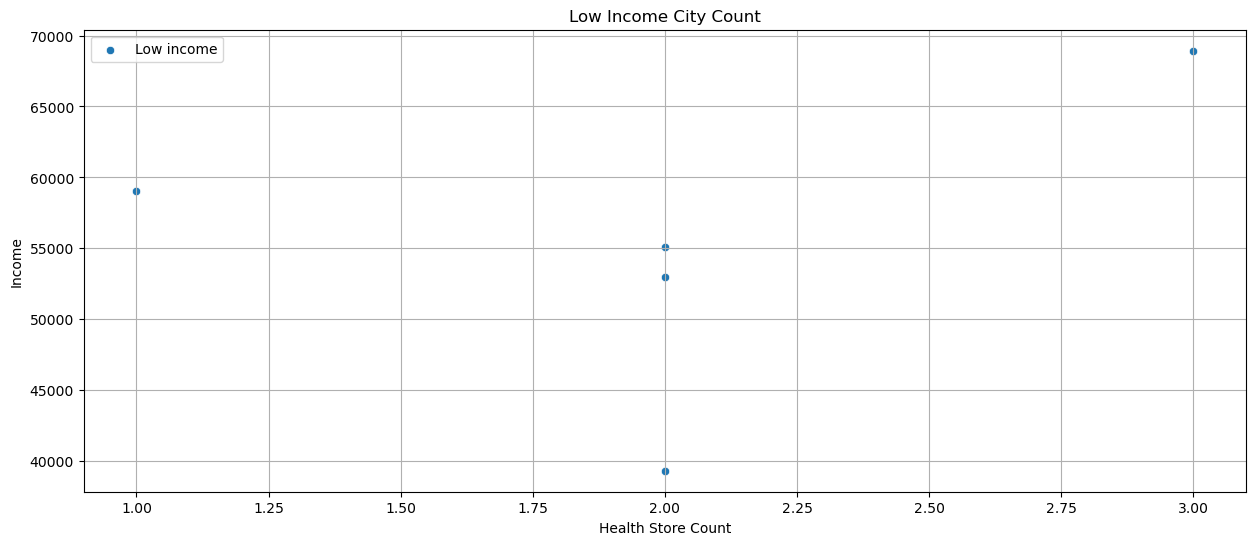

In [57]:
linear_regression_plt(
    city_count_df['Count'],
    no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'Low']['Income'],
    label='Low income',  # This label is for the scatter plot
    title='Low Income City Count'
)

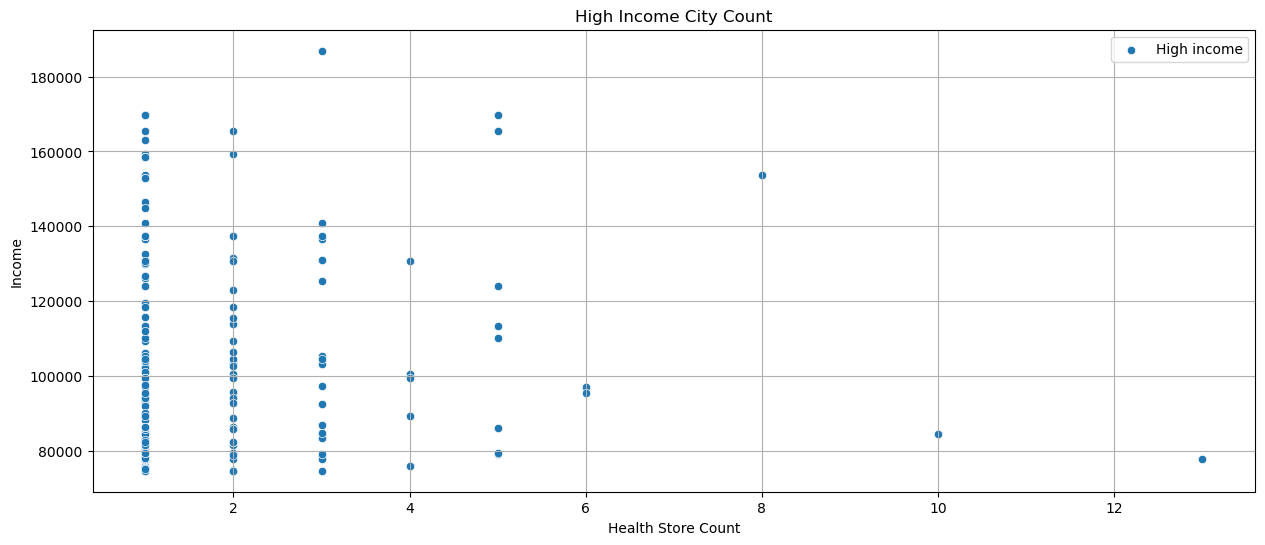

In [58]:
linear_regression_plt(
    city_count_df['Count'],
    no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High']['Income'],
    label='High income',  # This label is for the scatter plot
    title='High Income City Count'
)

In [34]:
no_dups_health_food_df.head(1)

,City,State,Lat,Lon,Category_Label,Location_Name,Income
0,Phoenix,Arizona,33.448437,-112.074141,High,Healthy Habit,75969


<Axes: title={'center': 'Income'}, xlabel='Category_Label'>

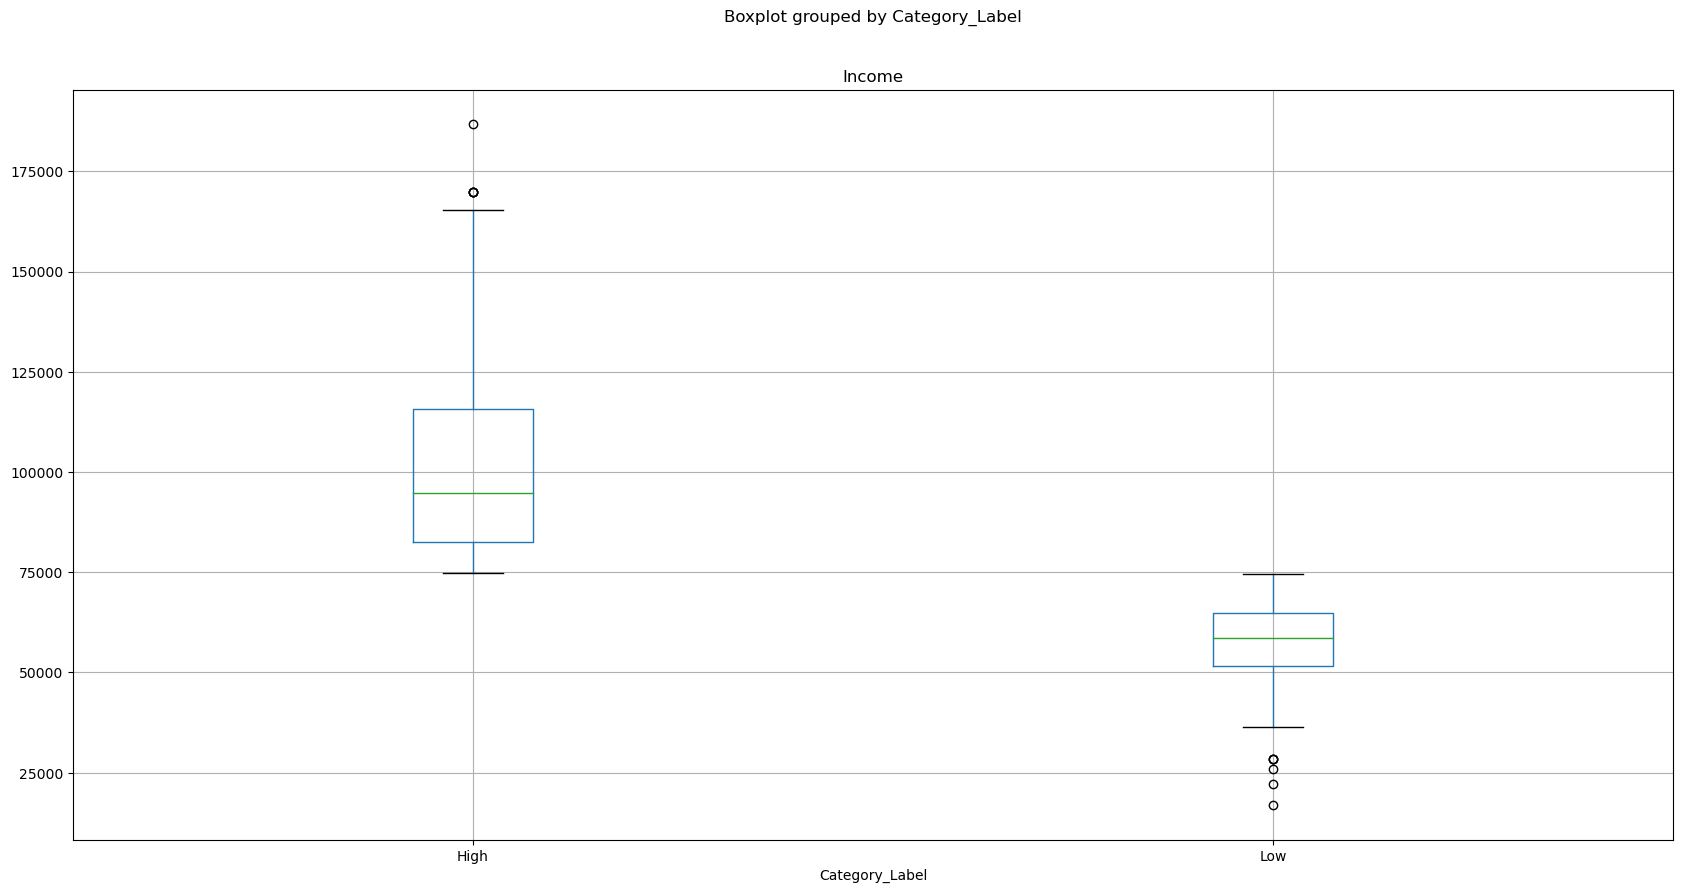

In [35]:
no_dups_health_food_df.boxplot("Income", by="Category_Label", figsize=(20, 10))

In [36]:
group0 = no_dups_health_food_df[no_dups_health_food_df["Category_Label"] == "High"]["Income"]
group1 = no_dups_health_food_df[no_dups_health_food_df["Category_Label"] == "Low"]["Income"]

In [37]:
# Perform the ANOVA
stats.f_oneway(group0, group1)

F_onewayResult(statistic=468.8085135768975, pvalue=3.701340737386531e-69)

In [38]:
#T-test for both high and low income groups

high_income = no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High']['Income']
low_income = no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'Low']['Income']

# Perform t-test
t_statistic, p_value = ttest_ind(high_income, low_income, equal_var=False)

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between high and low income groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between high and low income groups.")

T-Statistic: 23.829834929245777
P-Value: 9.871618307005195e-73
Reject the null hypothesis. There is a significant difference between high and low income groups.


In [39]:
def linear_regression_plt_2(x, y, label, title):
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, label=label)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    slope = model.coef_[0]
    intercept = model.intercept_
    
    x_range = np.linspace(min(x), max(x), 100)
    y_pred = model.predict(x_range.reshape(-1, 1))

    # Plot the linear regression line
    plt.plot(x_range, y_pred, color='red', label='Linear Regression')

    # Add annotation for the slope
    plt.annotate(f'Slope: {slope:.2f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=12, color='blue')

    # Draw a line representing the slope
    line_x = np.array([min(x), max(x)])
    line_y = slope * line_x + intercept
    plt.plot(line_x, line_y, linestyle='--', color='green', label='Slope Line')

    plt.title(title)
    plt.xlabel('Health Store Count by Index 1 to 1')
    plt.ylabel('Income')
    plt.grid(True)
    plt.legend()
    plt.show()

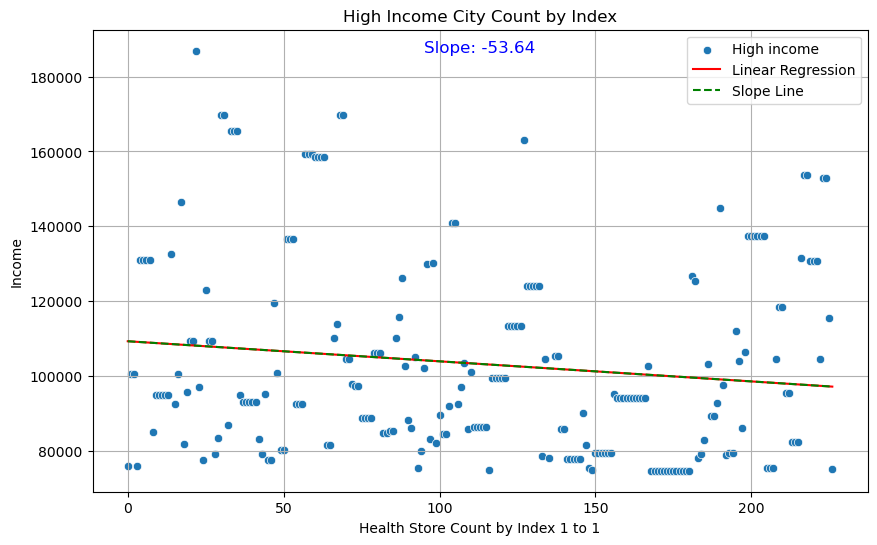

In [40]:
linear_regression_plt_2(
     no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High'].index,
    no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'High']['Income'],
    label='High income',  # This label is for the scatter plot
    title='High Income City Count by Index'
)

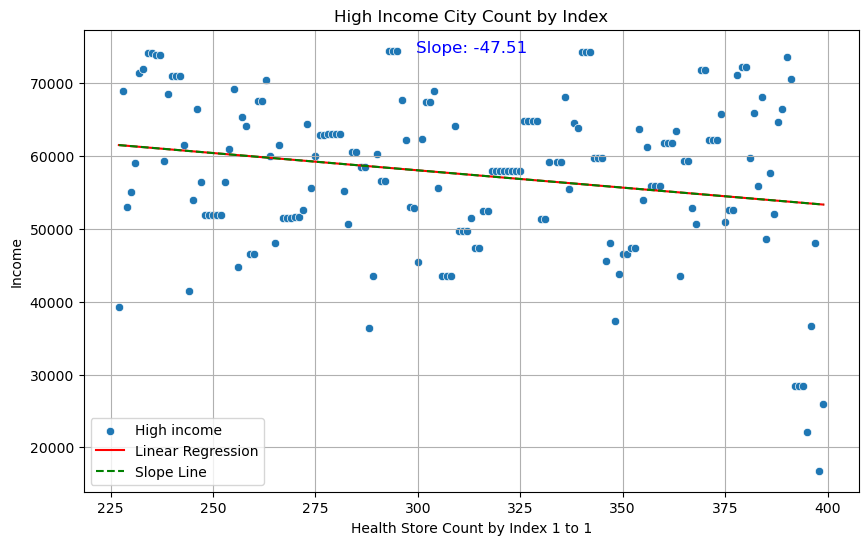

In [41]:
linear_regression_plt_2(
     no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'Low'].index,
    no_dups_health_food_df[no_dups_health_food_df['Category_Label'] == 'Low']['Income'],
    label='High income',  # This label is for the scatter plot
    title='High Income City Count by Index'
)